Question 1

**Number of multiplications = nmk**

**Number of multiplications = nm(k-1)**

Let the (n, k) matrix be A, and (k, m) matrix be B. Multiplying them would give us a (n, m) matrix, named C. C has nm elements. Every element at position (i, j) is calculated by adding all the product of (i, x)th element of A with the (x, j)th element of B. x ranges from 1 to k, which means, there are k products added to give the element at (i, j) in C. There are k multiplications for every element in C, so the total number of multiplications are nmk.
For every element in C, there are k products to be added. This means, addition is performed k-1 times for every element. Since there is k-1 additions for every element of the nm elements of C, the total number of additions are nm(k-1).

Question 2

In [7]:
import random
import numpy as np
import time

A = []
B = []
n = 2
k = 3
m = 4
templist = []
for i in range(n):
  templist = []
  for j in range(k):
    templist = templist + [random.randint(0, 9)]
  A = A + [templist]
for i in range(k):
  templist = []
  for j in range(m):
    templist = templist + [random.randint(0, 9)]
  B = B + [templist]
print("First Matrix, A = ")
for i in range(n):
  for j in range(k):
    print(A[i][j], end=" ")
  print()
print("Second Matrix, B = ")
for i in range(k):
  for j in range(m):
    print(B[i][j], end=" ")
  print()

t1 = time.time()
C1 = []
tempel = 0
for i in range(n):
  templist = []
  for j in range(m):
    tempel = 0
    for x in range(k):
      tempel += (A[i][x] * B[x][j])
    templist += [tempel]
  C1 += [templist]
t2 = time.time()

print("Using list of lists, C1 = ")
for i in range(n):
  for j in range(m):
    print(C1[i][j], end=" ")
  print()
print("Time taken by using list of lists = ", (t2-t1)*1000, " ms")

t3 = time.time()
C2 = np.dot(A, B)
t4 = time.time()
print("Using numpy, C2 = ")
for i in range(n):
  for j in range(m):
    print(C2[i][j], end=" ")
  print()
print("Time taken by using numpy = ", (t4-t3)*1000, " ms")

First Matrix, A = 
2 3 3 
2 2 8 
Second Matrix, B = 
8 6 0 2 
0 4 3 5 
7 7 8 6 
Using list of lists, C1 = 
37 45 33 37 
72 76 70 62 
Time taken by using list of lists =  0.4963874816894531  ms
Using numpy, C2 = 
37 45 33 37 
72 76 70 62 
Time taken by using numpy =  0.15020370483398438  ms


As seen from the code above, using numpy is faster than using list of lists. This is because numpy operates on the matrices as vectors, which would eliminate the need of loops, thus lowering the operation time.

Question 3

Median is the middle element in a sorted array, i.e., the (n/2)th smallest element or the (n/2)th largest element. Using the method of finding the (k)th largest element by k passes of the array, we would need (n/2) passes to find the median. Every pass would traverse on n elements. Total number of operations would be (n^2/2). Hence, the time complexity will be O(n^2).
A better method includes sorting the array using Quick sort or Merge sort, which has a time complexity of O(nlogn). Then the middle element will be the median if n is odd, or the average of the middlemost two elements if n is even.

In [50]:
arr1 = []
arr2 = []
arr3 = []
n = 11111
for i in range(n):
  arr1 += [random.random()]
  arr2 += [arr1[i]]
  arr3 += [arr1[i]]

t1 = time.time()
newmax = arr1[0]
for i in range((n+1)//2):
  newmax = arr1[0]
  for j in range(n-i):
    if (arr1[j] > newmax):
      newmax = arr1[j]
  arr1.remove(newmax)
Median1 = newmax
t2 = time.time()
print("Median using elimination of largest element = ", Median1)
print("Time taken = ", (t2-t1)*1000, " ms")

t3 = time.time()
arr2.sort()
Median2 = arr2[(n-1)//2]
t4 = time.time()
print("Median using sorted array = ", Median2)
print("Time taken = ", (t4-t3)*1000, " ms")

arr4 = np.array(arr3)
t5 = time.time()
Median3 = np.median(arr4)
t6 = time.time()
print("Median using numpy.median = ", Median3)
print("Time taken = ", (t6-t5)*1000, " ms")

Median using elimination of largest element =  0.5011410838401565
Time taken =  6990.910768508911  ms
Median using sorted array =  0.5011410838401565
Time taken =  1.996755599975586  ms
Median using numpy.median =  0.5011410838401565
Time taken =  0.6940364837646484  ms


Question 4

f(x, y) = x^2 . y + y^3 . sinx

Partial Derivative wrt x = 2 . x . y + y^3 . cosx

Partial Derivative wrt y = x^2 + 3 . y^2 . sinx

Gradient = (2 . x . y + y^3 . cosx, x^2 + 3 . y^2 . sinx)

Question 5

In [12]:
import jax.numpy as jnp
from jax import grad

def f(x, y):
  return ((x*x*y) + (y*y*y*(jnp.sin(x))))

def pdx_analytical(x, y):
  return ((2*x*y) + (y*y*y*(jnp.cos(x))))

def pdy_analytical(x, y):
  return ((x*x) + (3*y*y*(jnp.sin(x))))

pdx_jax = grad(lambda x, y: f(x, y), argnums=0)
pdy_jax = grad(lambda x, y: f(x, y), argnums=1)

xvals = [1.0, 2.0, 3.0, 4.0]
yvals = [5.0, 6.0, 7.0, 8.0]
for i in range(4):
  pdx = pdx_jax(xvals[i], yvals[i])
  pdy = pdy_jax(xvals[i], yvals[i])
  print(f"for (x, y) = ({xvals[i]}, {yvals[i]})")
  print(f"JAX Gradient = ({pdx}, {pdy})")
  print(f"Analytical Gradient = ({pdx_analytical(xvals[i], yvals[i])}, {pdy_analytical(xvals[i], yvals[i])})")

for (x, y) = (1.0, 5.0)
JAX Gradient = (77.53778076171875, 64.11032104492188)
Analytical Gradient = (77.53778076171875, 64.11032104492188)
for (x, y) = (2.0, 6.0)
JAX Gradient = (-65.8877182006836, 102.20411682128906)
Analytical Gradient = (-65.8877182006836, 102.20411682128906)
for (x, y) = (3.0, 7.0)
JAX Gradient = (-297.5674133300781, 29.744640350341797)
Analytical Gradient = (-297.5674133300781, 29.744640350341797)
for (x, y) = (4.0, 8.0)
JAX Gradient = (-270.66552734375, -129.3060760498047)
Analytical Gradient = (-270.66552734375, -129.3060760498047)


Question 6

In [14]:
import sympy as sp

x, y = sp.symbols('x y')
f = (x*x*y) + (y*y*y*(sp.sin(x)))
pdx_sympy = sp.diff(f, x)
pdy_sympy = sp.diff(f, y)
for i in range(4):
  pdx = pdx_sympy.subs({x: xvals[i], y: yvals[i]})
  pdy = pdy_sympy.subs({x: xvals[i], y: yvals[i]})
  print(f"for (x, y) = ({xvals[i]}, {yvals[i]})")
  print(f"Sympy Gradient = ({pdx}, {pdy})")
  print(f"Analytical Gradient = ({pdx_analytical(xvals[i], yvals[i])}, {pdy_analytical(xvals[i], yvals[i])})")

for (x, y) = (1.0, 5.0)
Sympy Gradient = (77.5377882335175, 64.1103238605922)
Analytical Gradient = (77.53778076171875, 64.11032104492188)
for (x, y) = (2.0, 6.0)
Sympy Gradient = (-65.8877166941828, 102.204122097174)
Analytical Gradient = (-65.8877182006836, 102.20411682128906)
for (x, y) = (3.0, 7.0)
Sympy Gradient = (-297.567426333953, 29.7446411848005)
Analytical Gradient = (-297.5674133300781, 29.744640350341797)
for (x, y) = (4.0, 8.0)
Sympy Gradient = (-270.665533882169, -129.306079099122)
Analytical Gradient = (-270.66552734375, -129.3060760498047)


Question 7

In [4]:
CollegeDatabase = {
    2022: {
        "Branch1": {
            1: {
                "Roll Number": 1,
                "Name": "N",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "M",
                "Marks": {
                    "Maths": 70,
                    "English": 100
                }
            }
        },
        "Branch2": {
            1: {
                "Roll Number": 3,
                "Name": "O",
                "Marks": {
                    "Maths": 100,
                    "French": 70
                }
            },
            2: {
                "Roll Number": 4,
                "Name": "P",
                "Marks": {
                    "Maths": 70,
                    "French": 100
                }
            }
        }
    },
    2023: {
        "Branch1": {
            1: {
                "Roll Number": 1,
                "Name": "Q",
                "Marks": {
                    "Maths": 80,
                    "English": 70
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "R",
                "Marks": {
                    "Maths": 70,
                    "English": 80
                }
            }
        },
        "Branch2": {
            1: {
                "Roll Number": 3,
                "Name": "S",
                "Marks": {
                    "Maths": 100,
                    "French": 80
                }
            },
            2: {
                "Roll Number": 4,
                "Name": "T",
                "Marks": {
                    "Maths": 80,
                    "French": 100
                }
            }
        }
    },
    2024: {
        "Branch1": {
            1: {
                "Roll Number": 1,
                "Name": "U",
                "Marks": {
                    "Maths": 100,
                    "English": 70
                }
            },
            2: {
                "Roll Number": 2,
                "Name": "V",
                "Marks": {
                    "Maths": 70,
                    "English": 100
                }
            }
        },
        "Branch2": {
            1: {
                "Roll Number": 3,
                "Name": "W",
                "Marks": {
                    "Maths": 100,
                    "French": 70
                }
            },
            2: {
                "Roll Number": 4,
                "Name": "X",
                "Marks": {
                    "Maths": 70,
                    "French": 100
                }
            }
        }
    }
}
print(CollegeDatabase[2023]["Branch1"][2]["Marks"]["Maths"])

70


Question 8

In [8]:
class Marks:
  def __init__(self, maths, english, french):
    self.maths = maths
    self.english = english
    self.french = french

class Student:
  def __init__(self, rollno, name, marks):
    self.rollno = rollno
    self.name = name
    self.marks = marks

class Branch:
  def __init__(self, BranchName):
    self.BranchName = BranchName
    self.student = []
  def add_student(self, s):
    self.student.append(s)

class Year:
  def __init__(self, YearNo):
    self.YearNo = YearNo
    self.branch = []
  def add_branch(self, b):
    self.branch.append(b)

class CollegeDatabase:
  def __init__(self):
    self.year = []
  def add_year(self, y):
    self.year.append(y)

CDB = CollegeDatabase()
N = Student(1, "N", Marks(100, 70, 0))
M = Student(2, "M", Marks(70, 100, 0))
b221 = Branch("Branch1")
b221.add_student(N)
b221.add_student(M)
O = Student(3, "O", Marks(100, 0, 70))
P = Student(4, "P", Marks(70, 0, 100))
b222 = Branch("Branch2")
b222.add_student(O)
b222.add_student(P)
y22 = Year(2022)
y22.add_branch(b221)
y22.add_branch(b222)
CDB.add_year(y22)
Q = Student(1, "Q", Marks(80, 70, 0))
R = Student(2, "R", Marks(70, 80, 0))
b231 = Branch("Branch1")
b231.add_student(Q)
b231.add_student(R)
S = Student(3, "S", Marks(100, 0, 80))
T = Student(4, "T", Marks(80, 0, 100))
b232 = Branch("Branch2")
b232.add_student(S)
b232.add_student(T)
y23 = Year(2023)
y23.add_branch(b231)
y23.add_branch(b232)
CDB.add_year(y23)
U = Student(1, "U", Marks(100, 70, 0))
V = Student(2, "V", Marks(70, 100, 0))
b241 = Branch("Branch1")
b241.add_student(U)
b241.add_student(V)
W = Student(3, "W", Marks(100, 0, 70))
X = Student(4, "X", Marks(70, 0, 100))
b242 = Branch("Branch2")
b242.add_student(W)
b242.add_student(X)
y24 = Year(2024)
y24.add_branch(b241)
y24.add_branch(b242)
CDB.add_year(y24)
for yy in CDB.year:
  if (yy.YearNo == 2023):
    for bb in yy.branch:
      if (bb.BranchName == "Branch1"):
        for ss in bb.student:
          if (ss.rollno == 2):
            print(ss.marks.maths)

70


Question 9

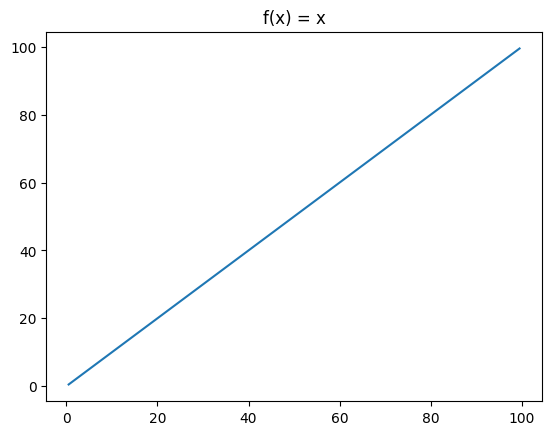

In [27]:
import matplotlib.pyplot as plt
import numpy as np

def f1(x):
  return x

x = np.arange(0.5, 100.0, 0.5)
y = f1(x)
plt.plot(x, y)
plt.title("f(x) = x")
plt.show()

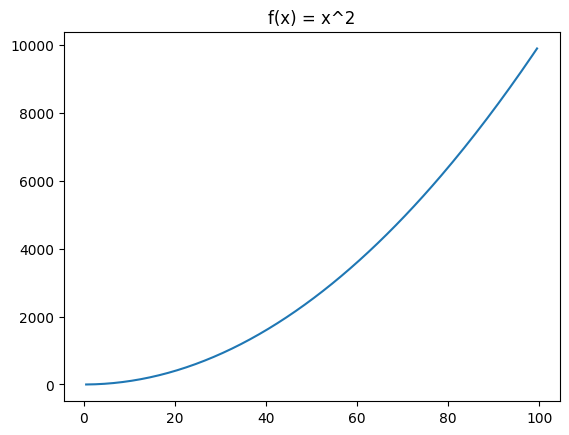

In [29]:
def f2(x):
  return x*x

x = np.arange(0.5, 100.0, 0.5)
y = f2(x)
plt.plot(x, y)
plt.title("f(x) = x^2")
plt.show()

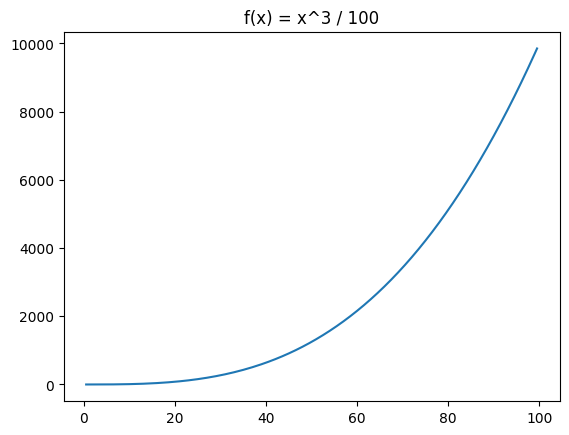

In [30]:
def f3(x):
  return (x*x*x/100)

x = np.arange(0.5, 100.0, 0.5)
y = f3(x)
plt.plot(x, y)
plt.title("f(x) = x^3 / 100")
plt.show()

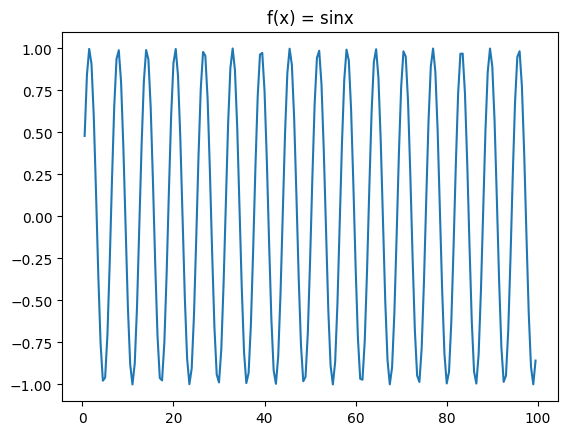

In [31]:
def f4(x):
  return np.sin(x)

x = np.arange(0.5, 100.0, 0.5)
y = f4(x)
plt.plot(x, y)
plt.title("f(x) = sinx")
plt.show()

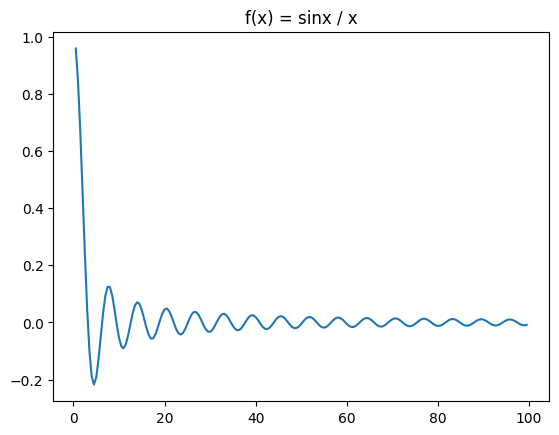

In [32]:
def f5(x):
  return (np.sin(x)/x)

x = np.arange(0.5, 100.0, 0.5)
y = f5(x)
plt.plot(x, y)
plt.title("f(x) = sinx / x")
plt.show()

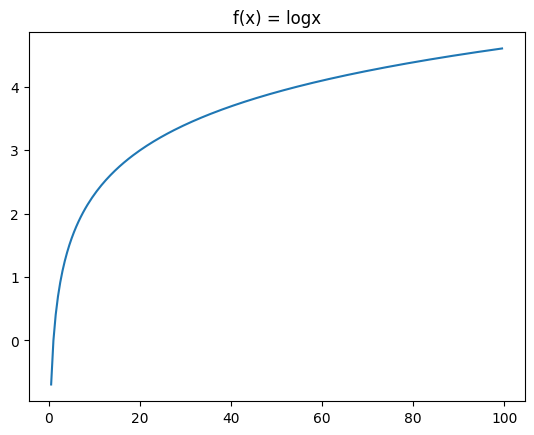

In [33]:
def f6(x):
  return np.log(x)

x = np.arange(0.5, 100.0, 0.5)
y = f6(x)
plt.plot(x, y)
plt.title("f(x) = logx")
plt.show()

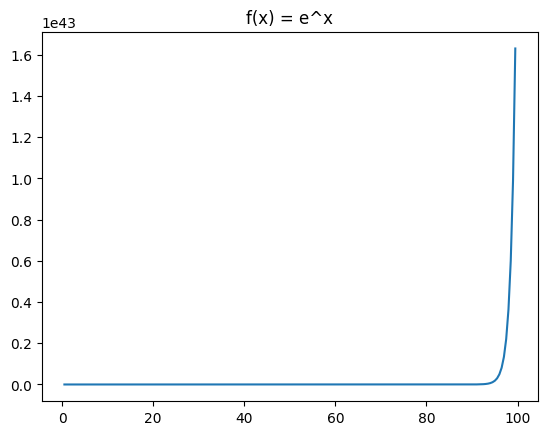

In [37]:
import math

def f7(x):
  return (math.e)**x

x = np.arange(0.5, 100.0, 0.5)
y = f7(x)
plt.plot(x, y)
plt.title("f(x) = e^x")
plt.show()

Question 10

In [53]:
import random
import pandas as pd

mtx = []
for i in range(20):
  tmplist = []
  for j in range(5):
    tmplist += [random.random()+1]
  mtx += [tmplist]

df = pd.DataFrame(mtx, columns=["a", "b", "c", "d", "e"])
print(df)
dfstds = df.std(axis=0)
print("Highest standard deviation is of column ", dfstds.idxmax())

dfmeans = df.mean(axis=1)
print("Highest mean is of row ", dfmeans.idxmax())

           a         b         c         d         e
0   1.664459  1.709239  1.763511  1.401462  1.577504
1   1.172172  1.189701  1.969467  1.237149  1.358069
2   1.521091  1.463314  1.546958  1.315252  1.817728
3   1.322368  1.344789  1.793521  1.343515  1.853523
4   1.513319  1.652441  1.410148  1.653819  1.425982
5   1.035149  1.038146  1.403240  1.625161  1.595659
6   1.867439  1.059311  1.659621  1.353430  1.984030
7   1.448727  1.026569  1.473569  1.268992  1.875744
8   1.352208  1.097296  1.260602  1.948402  1.754232
9   1.007649  1.750034  1.026459  1.811600  1.506538
10  1.137129  1.213914  1.190050  1.193425  1.109123
11  1.699879  1.155299  1.639358  1.316736  1.898853
12  1.609125  1.140251  1.921709  1.844926  1.203226
13  1.902456  1.334909  1.660789  1.479961  1.664619
14  1.340467  1.529326  1.574249  1.246880  1.216360
15  1.350965  1.685132  1.201439  1.846217  1.303790
16  1.364108  1.455558  1.274482  1.443695  1.831974
17  1.637980  1.561376  1.703187  1.764039  1.

Question 11

In [54]:
df["f"] = df.sum(axis=1)

df["g"] = ""
norows = 0
for i in range(20):
  if (df.loc[i, "f"] < 8):
    df.loc[i, "g"] = "LT8"
    norows += 1
  else:
    df.loc[i, "g"] = "GT8"
print(df)

print("Number of rows with g column value LT8 = ", norows)

groupedstds = df.groupby("g")["f"].std()
print("Standard deviation of g = LT8 = ", groupedstds["LT8"])
print("Standard deviation of g = GT8 = ", groupedstds["GT8"])

           a         b         c         d         e         f    g
0   1.664459  1.709239  1.763511  1.401462  1.577504  8.116174  GT8
1   1.172172  1.189701  1.969467  1.237149  1.358069  6.926557  LT8
2   1.521091  1.463314  1.546958  1.315252  1.817728  7.664342  LT8
3   1.322368  1.344789  1.793521  1.343515  1.853523  7.657716  LT8
4   1.513319  1.652441  1.410148  1.653819  1.425982  7.655709  LT8
5   1.035149  1.038146  1.403240  1.625161  1.595659  6.697356  LT8
6   1.867439  1.059311  1.659621  1.353430  1.984030  7.923831  LT8
7   1.448727  1.026569  1.473569  1.268992  1.875744  7.093601  LT8
8   1.352208  1.097296  1.260602  1.948402  1.754232  7.412740  LT8
9   1.007649  1.750034  1.026459  1.811600  1.506538  7.102279  LT8
10  1.137129  1.213914  1.190050  1.193425  1.109123  5.843642  LT8
11  1.699879  1.155299  1.639358  1.316736  1.898853  7.710125  LT8
12  1.609125  1.140251  1.921709  1.844926  1.203226  7.719237  LT8
13  1.902456  1.334909  1.660789  1.479961  1.66

Question 12

Broadcasting is the ability of the NumPy library to perform operations on matrices with different dimensions in an efficient and intuitive manner.

In the following code, mat1 has dimensions of (3,) and mat2 has dimensions (1, 3). While adding the matrices, both are broadcasted to be a (3, 3) matrix.

In [57]:
import numpy as np
mat1 = np.array([1, 2, 3])
mat2 = np.array([[1], [2], [3]])
mat3 = mat1 + mat2
print(mat3)

[[2 3 4]
 [3 4 5]
 [4 5 6]]


Question 13

In [60]:
def argmincalc(arr):
  curmin = arr[0]
  indcurmin = 0
  for i in range(len(arr)):
    if (arr[i] < curmin):
      curmin = arr[i]
      indcurmin = i
  return indcurmin

testarr = np.random.randint(0, 100, 10)
print(testarr)
print("argmin by function = ", argmincalc(testarr))
print("argmin by numpy = ", np.argmin(testarr))

[38 94 34  9 80  2 95 95 57 74]
argmin by function =  5
argmin by numpy =  5
